# Drug Classification

## Introduction

Different drugs work uniquely depending on a patient’s physiological and health characteristics, and accurately predicting which drug type will be most effective can significantly improve patient outcomes. By examining factors such as age, gender, blood pressure, cholesterol levels, and sodium-to-potassium ratio, it becomes possible to identify patterns that inform drug selection. This process is known as personalized medicine, aiming to increase treatment efficacy and reduce adverse effects.

In this project, I will explore the factors contributing to drug effectiveness using a dataset available on Kaggle. The primary goal is to predict the "Drug Type" based on various patient characteristics, making this an ideal application for machine learning techniques.

## About the Dataset

The dataset includes the following columns:

1.   **Age:** The patient’s age, a potential determinant of drug metabolism and efficacy.
2.   **Sex:** Biological sex, which may influence how drugs are processed in the body.
3. **Blood Pressure Levels (BP):** Blood pressure can affect drug absorption and distribution.
4. **Cholesterol Levels:** High cholesterol can impact how the body handles various medications.
5. **Na to Potassium Ratio:** The sodium-to-potassium ratio may influence the body's responsiveness to specific drug treatments.
6. **Drug:** The target feature of the dataset.

## Research Question



**Can we accurately predict the drug type suited to a patient based on individual health characteristics?**

To answer this question, I will follow a structured approach:

1. Exploring and Refining the Dataset
2. Data Analysis and Visualization
3. Data Binning
4. Machine Learning

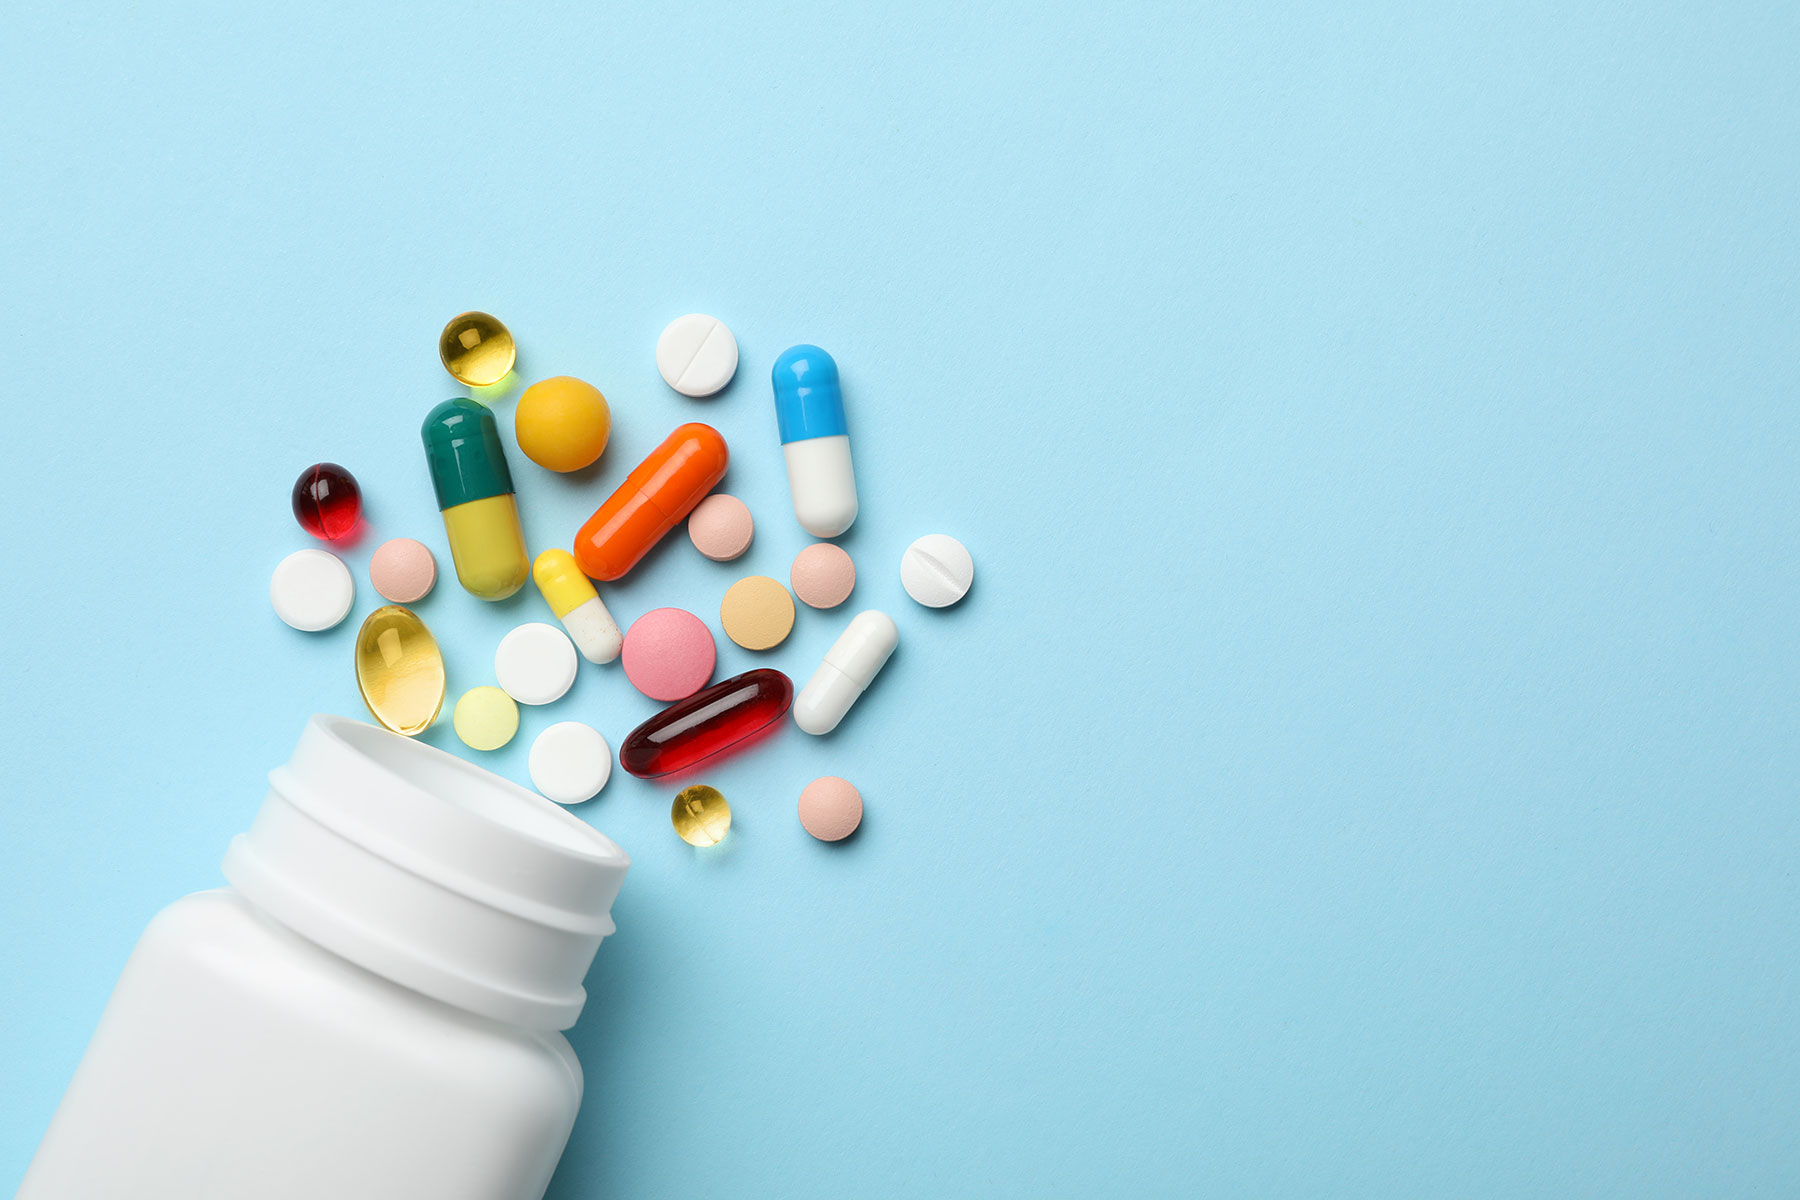

## Part 1: Exploring and Refining the Dataset

In [427]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [428]:
# Load data
drug = pd.read_csv("/content/drug200.csv")
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [429]:
# Dataset size

drug.shape

(200, 6)

In [430]:
# Looking for any missing values

drug.isna().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [431]:
print ("Duplicate values in the drugs dataset are:" , drug.duplicated().sum())

Duplicate values in the drugs dataset are: 0


There are no missing or duplicate values in this dataset. I will now begin to explore categorical variables.

In [432]:
# Categorical variables
drug.Drug.value_counts()

,count
Drug,
DrugY,91
drugX,54
drugA,23
drugC,16
drugB,16


In [433]:
# Categorical variables
drug.Sex.value_counts()

,count
Sex,
M,104
F,96


In [434]:
# Categorical variables
drug.BP.value_counts()

,count
BP,
HIGH,77
LOW,64
NORMAL,59


In [435]:
# Categorical variables
drug.Cholesterol.value_counts()

,count
Cholesterol,
HIGH,103
NORMAL,97


As seen above, drugY has the highest count. Sex, BP and cholestrol value counts are relatively balanced. I will now begin to explore the numerical values in the dataset; age and Na_to_K.

In [436]:
# Numerical variables
drug.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


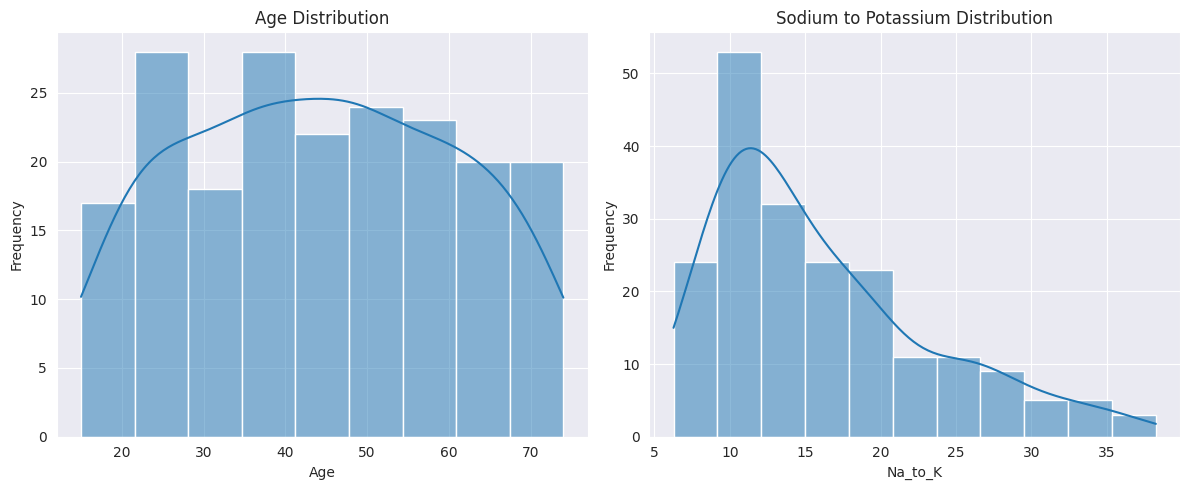

In [437]:
# Age and Na_to_K distribution plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Age distribution plot
sns.histplot(drug['Age'], kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Na_to_K distribution plot
sns.histplot(drug['Na_to_K'], kde=True, ax=axes[1])
axes[1].set_title('Sodium to Potassium Distribution')
axes[1].set_xlabel('Na_to_K')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## Part 2: Data Binning

In [438]:
# Age bins
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']

# Create a new DataFrame and add Age_Group
drug_df = drug.copy()
drug_df['Age_Group'] = pd.cut(drug_df['Age'], bins=bin_age, labels=category_age)

# Drop the 'Age' column
drug_df = drug_df.drop(columns=['Age'])

print(drug_df[['Age_Group']].head())


  Age_Group
0       20s
1       40s
2       40s
3       20s
4       60s


In [439]:
drug_df.head()

,Sex,BP,Cholesterol,Na_to_K,Drug,Age_Group
0,F,HIGH,HIGH,25.355,DrugY,20s
1,M,LOW,HIGH,13.093,drugC,40s
2,M,LOW,HIGH,10.114,drugC,40s
3,F,NORMAL,HIGH,7.798,drugX,20s
4,F,LOW,HIGH,18.043,DrugY,60s


In [440]:
# Na_to_K bins
bin_Na_to_K = [0, 9, 19, 29, 50]
category_Na_to_K = ['<10', '10-20', '20-30', '>30']
drug_df['Na_to_K_Group'] = pd.cut(drug_df['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
drug_df = drug_df.drop(['Na_to_K'], axis = 1)

print(drug_df[['Na_to_K_Group']].head())

  Na_to_K_Group
0         20-30
1         10-20
2         10-20
3           <10
4         10-20


In [441]:
drug_df.head()

,Sex,BP,Cholesterol,Drug,Age_Group,Na_to_K_Group
0,F,HIGH,HIGH,DrugY,20s,20-30
1,M,LOW,HIGH,drugC,40s,10-20
2,M,LOW,HIGH,drugC,40s,10-20
3,F,NORMAL,HIGH,drugX,20s,<10
4,F,LOW,HIGH,DrugY,60s,10-20


## Part 3: Data Analysis and Visualization

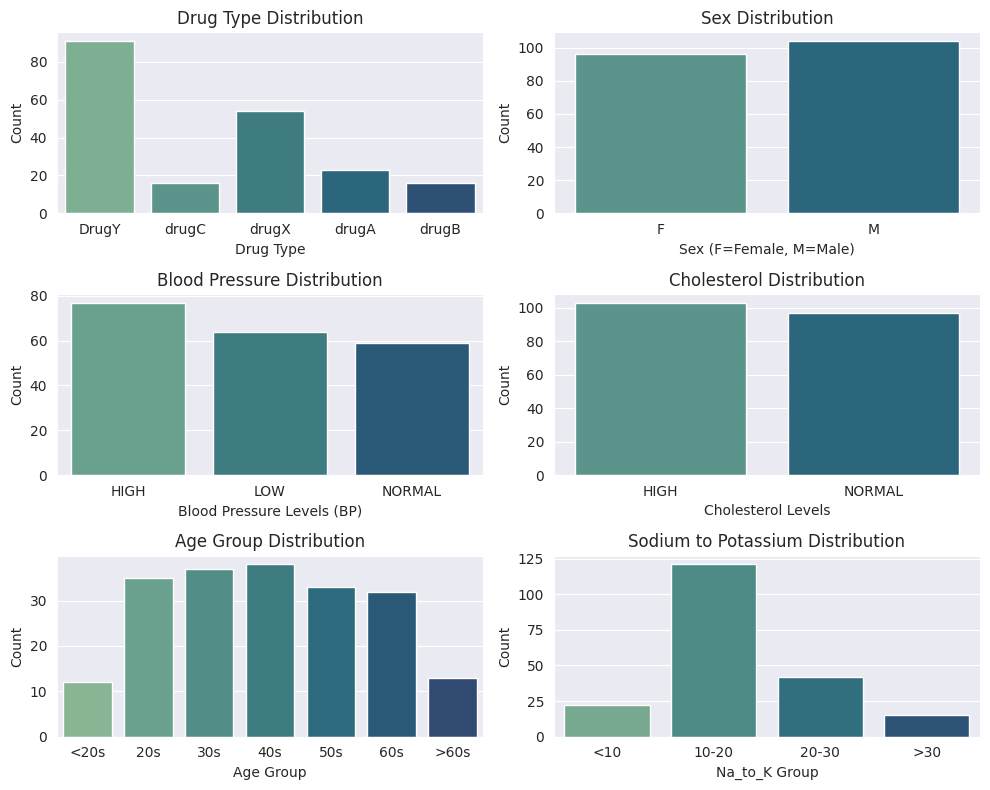

In [442]:
# 3x2 grid for subplots
fig, axes = plt.subplots(3, 2, figsize=(10, 8))

# Seaborn style
sns.set_style("darkgrid")

# Plot 1: Drug Type Distribution
sns.countplot(data=drug, x='Drug', hue='Drug', palette="crest", dodge=False, legend=False, ax=axes[0, 0])
axes[0, 0].set_title('Drug Type Distribution')
axes[0, 0].set_xlabel('Drug Type')
axes[0, 0].set_ylabel('Count')

# Plot 2: Sex Distribution
sns.countplot(data=drug, x="Sex", hue="Sex", palette="crest", dodge=False, legend=False, ax=axes[0, 1])
axes[0, 1].set_title('Sex Distribution')
axes[0, 1].set_xlabel('Sex (F=Female, M=Male)')
axes[0, 1].set_ylabel('Count')

# Plot 3: Blood Pressure Distribution
sns.countplot(data=drug, x="BP", hue="BP", palette="crest", dodge=False, legend=False, ax=axes[1, 0])
axes[1, 0].set_title('Blood Pressure Distribution')
axes[1, 0].set_xlabel('Blood Pressure Levels (BP)')
axes[1, 0].set_ylabel('Count')

# Plot 4: Cholesterol Distribution
sns.countplot(data=drug, x="Cholesterol", hue="Cholesterol", palette="crest", dodge=False, legend=False, ax=axes[1, 1])
axes[1, 1].set_title('Cholesterol Distribution')
axes[1, 1].set_xlabel('Cholesterol Levels')
axes[1, 1].set_ylabel('Count')

# Plot 5: Age Group Distribution
sns.countplot(data=drug_df, x="Age_Group", hue="Age_Group", palette="crest", dodge=False, legend=False, ax=axes[2, 0])
axes[2, 0].set_title('Age Group Distribution')
axes[2, 0].set_xlabel('Age Group')
axes[2, 0].set_ylabel('Count')

# Plot 6: Na_to_K Group Distribution
sns.countplot(data=drug_df, x="Na_to_K_Group", hue="Na_to_K_Group", palette="crest", dodge=False, legend=False, ax=axes[2, 1])
axes[2, 1].set_title('Sodium to Potassium Distribution')
axes[2, 1].set_xlabel('Na_to_K Group')
axes[2, 1].set_ylabel('Count')

# Layout
plt.tight_layout()
plt.show()


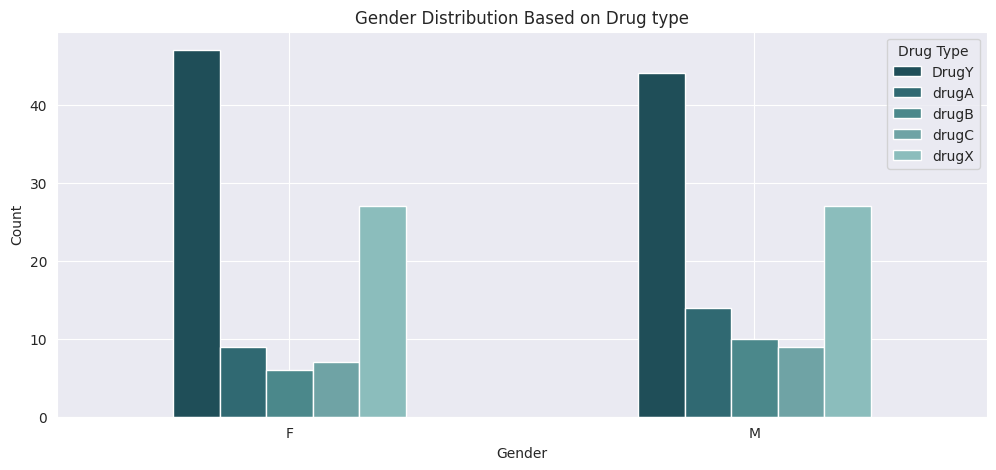

In [443]:
# Gender Distribution based on Drug Type
pd.crosstab(drug.Sex,drug.Drug).plot(kind="bar",figsize=(12,5),color = ['#1F4E58', '#306972', '#4B888B', '#6FA3A5', '#8BBDBC'])
plt.legend(title='Drug Type')
plt.title('Gender Distribution Based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

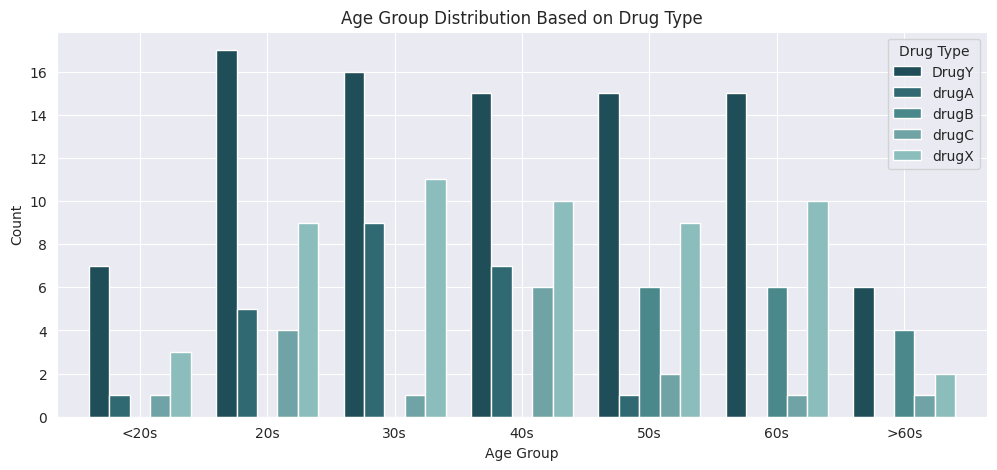

In [444]:
# Age Group Distribution based on Drug Type
pd.crosstab(drug_df.Age_Group, drug.Drug).plot(kind="bar", figsize=(12, 5), color=['#1F4E58', '#306972', '#4B888B', '#6FA3A5', '#8BBDBC'], width=0.8)
plt.legend(title='Drug Type')
plt.title('Age Group Distribution Based on Drug Type')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()


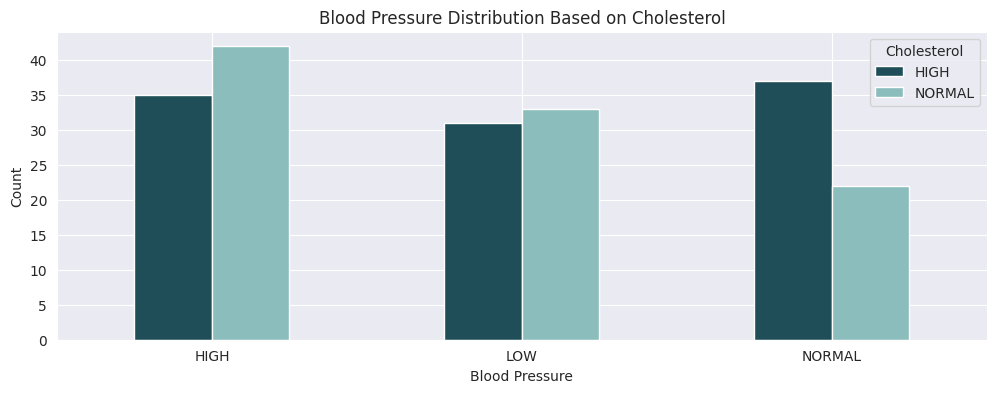

In [445]:
# Blood Pressure Distribution Based on Cholesterol
pd.crosstab(drug.BP,drug.Cholesterol).plot(kind="bar",figsize=(12,4),color=['#1F4E58','#8BBDBC'])
plt.title('Blood Pressure Distribution Based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

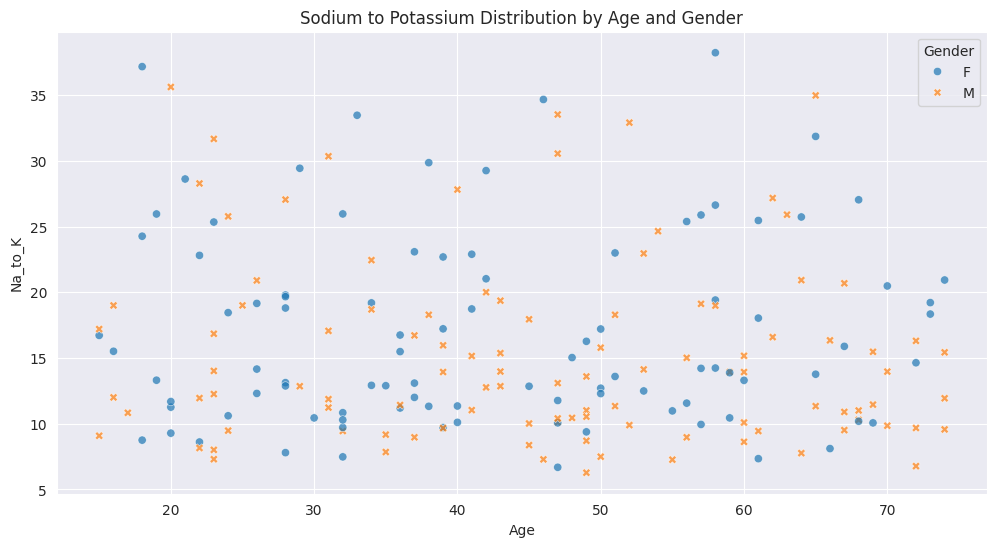

In [446]:
# Sodium to Potassium Distribution based on Gender and Age
plt.figure(figsize=(12, 6))
sns.scatterplot(data=drug, x='Age', y='Na_to_K', hue='Sex', style='Sex', alpha=0.7)
plt.title('Sodium to Potassium Distribution by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Na_to_K')
plt.legend(title='Gender')
plt.show()

## Part 4: Machine Learning

In [477]:
X = drug_df.drop(["Drug"], axis=1)
y = drug_df["Drug"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# 70% training, 30% testing

In [478]:
X_train.head()

,Sex,BP,Cholesterol,Age_Group,Na_to_K_Group
131,M,LOW,NORMAL,50s,>30
96,F,LOW,HIGH,50s,>30
181,F,NORMAL,HIGH,50s,10-20
19,F,HIGH,NORMAL,30s,20-30
153,F,LOW,NORMAL,>60s,10-20


In [479]:
# One-hot encoding with integer conversion
X_train = pd.get_dummies(X_train).astype(int)
X_test = pd.get_dummies(X_test).astype(int)

In [531]:
X_train.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_Group_<20s,Age_Group_20s,Age_Group_30s,Age_Group_40s,Age_Group_50s,Age_Group_60s,Age_Group_>60s,Na_to_K_Group_<10,Na_to_K_Group_10-20,Na_to_K_Group_20-30,Na_to_K_Group_>30
131,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
96,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
181,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0
19,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
153,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


In [481]:
X_test.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_Group_<20s,Age_Group_20s,Age_Group_30s,Age_Group_40s,Age_Group_50s,Age_Group_60s,Age_Group_>60s,Na_to_K_Group_<10,Na_to_K_Group_10-20,Na_to_K_Group_20-30,Na_to_K_Group_>30
18,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0
170,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0
107,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
98,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
177,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0


As seen previously in the EDA, Drug Y has a higher count in comparison to other drug types, meaning that we have an imbalanced dataset. Imbalanced datasets can lead to overfitting, as the model may end up biased towards the more common classes.

To address this issue, I have decided to use StandardScaler to preprocess the data by standardizing the feature values. StandardScaler scales each feature to have a mean of 0 and a standard deviation of 1, ensuring all features contribute equally to the model. This helps improve the model's performance and convergence by reducing the impact of features with different scales.



In [482]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Support Vector Machine - SVM

SVM Accuracy: 83.33%

Classification Report:
               precision    recall  f1-score   support

       DrugY       0.86      0.80      0.83        30
       drugA       0.60      0.60      0.60         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.94      0.89      0.91        18

    accuracy                           0.83        60
   macro avg       0.76      0.86      0.80        60
weighted avg       0.84      0.83      0.83        60

Confusion Matrix:
 [[24  2  1  2  1]
 [ 2  3  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 2  0  0  0 16]]


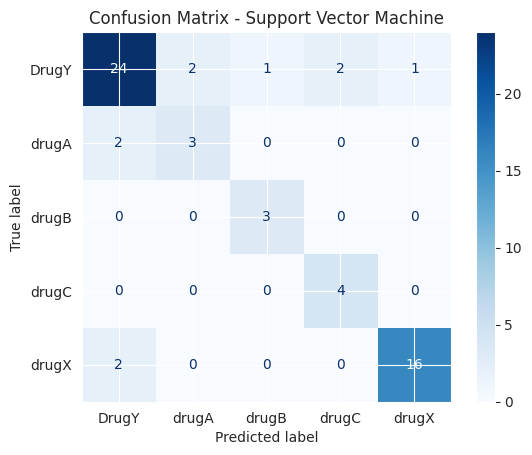

In [495]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Specified parameters
svm_model = SVC(kernel='linear', max_iter=1000)

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Model's Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy: {:.2f}%".format(accuracy * 100))

# Evaluation Metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=svm_model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Support Vector Machine")
plt.show()


### Logistic Regression

Logistic Regression Accuracy: 85.00%

Classification Report:
               precision    recall  f1-score   support

       DrugY       1.00      0.70      0.82        30
       drugA       0.71      1.00      0.83         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.85        60
   macro avg       0.79      0.94      0.84        60
weighted avg       0.89      0.85      0.85        60

Confusion Matrix:
 [[21  2  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]


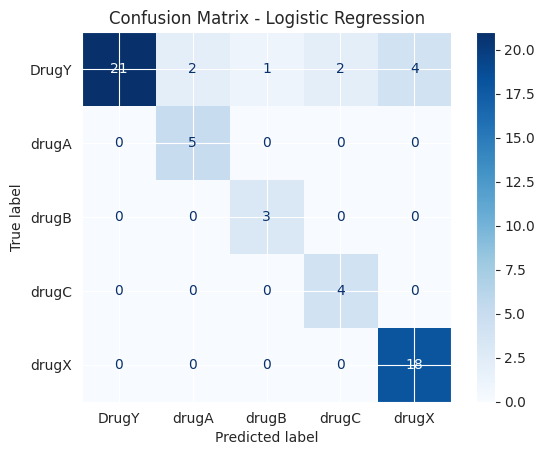

In [508]:
from sklearn.linear_model import LogisticRegression

# Specified parameters
lg_model = LogisticRegression(solver='liblinear', max_iter=5000)

# Train the model
lg_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = lg_model.predict(X_test_scaled)

# Model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy: {:.2f}%".format(accuracy * 100))

# Evaluation metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


### Random Forest Classifier

Random Forest Accuracy: 83.33%

Classification Report:
               precision    recall  f1-score   support

       DrugY       0.95      0.70      0.81        30
       drugA       0.67      0.80      0.73         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.83        60
   macro avg       0.77      0.90      0.82        60
weighted avg       0.86      0.83      0.83        60

Confusion Matrix:
 [[21  2  1  2  4]
 [ 1  4  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 0  0  0  0 18]]


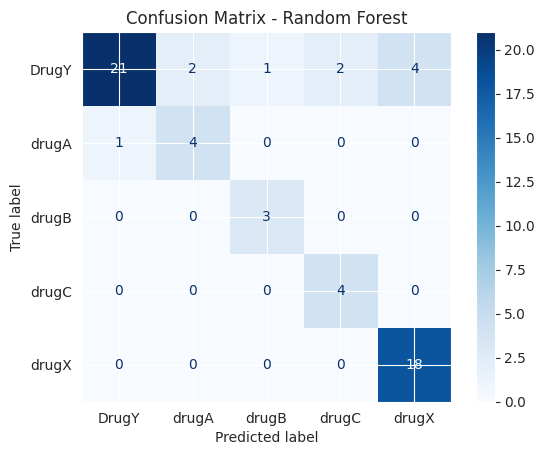

In [497]:
from sklearn.ensemble import RandomForestClassifier

# Specified parameters
rf_model = RandomForestClassifier(max_leaf_nodes=30, random_state=45)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Model's Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy: {:.2f}%".format(accuracy * 100))

# Evaluation Metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=rf_model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()


### Decision Tree Classifier

Decision Tree Accuracy: 78.33%

Classification Report:
               precision    recall  f1-score   support

       DrugY       0.87      0.67      0.75        30
       drugA       0.43      0.60      0.50         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.85      0.94      0.89        18

    accuracy                           0.78        60
   macro avg       0.71      0.84      0.76        60
weighted avg       0.81      0.78      0.78        60

Confusion Matrix:
 [[20  4  1  2  3]
 [ 2  3  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  4  0]
 [ 1  0  0  0 17]]


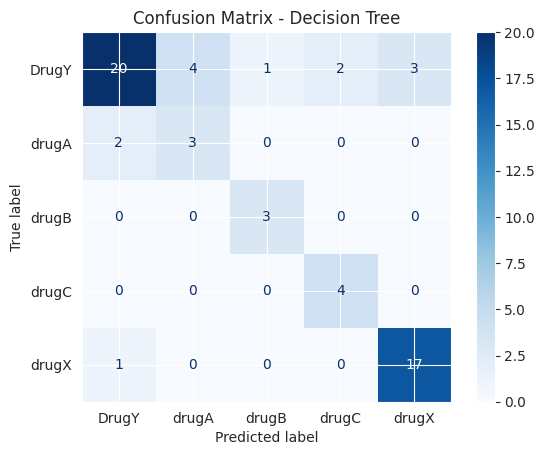

In [498]:
from sklearn.tree import DecisionTreeClassifier

# Specified Parameters
dt_model = DecisionTreeClassifier(max_leaf_nodes=20, random_state=42)

# Train the model
dt_model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = dt_model.predict(X_test_scaled)

# Model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy: {:.2f}%".format(accuracy * 100))

# Evaluation metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=dt_model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


### Comparing the Models

In [503]:
# DataFrame for comparison
compare = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest'],
    'Accuracy (%)': [LRAcc * 100, SVCAcc * 100, DTAcc * 100, RFAcc * 100]
})


print(compare)


                 Model  Accuracy (%)
0  Logistic Regression          85.0
1                  SVM          83.0
2        Decision Tree          78.0
3        Random Forest          83.0


### Testing Output / Example Usage

In [548]:
# New data for model to test on
X_test.head(1)

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_Group_<20s,Age_Group_20s,Age_Group_30s,Age_Group_40s,Age_Group_50s,Age_Group_60s,Age_Group_>60s,Na_to_K_Group_<10,Na_to_K_Group_10-20,Na_to_K_Group_20-30,Na_to_K_Group_>30
18,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0


In [549]:
# The expected output
y_test.head(1)

,Drug
18,drugC


In [552]:
def predict_drug(input_data, trained_model, scaler, columns):
    """
    Predict the Drug Type based on input data.

    Parameters:
        input_data (list or np.array): The input data for prediction (must match feature order).
        trained_model: The trained machine learning model (e.g., SVM).
        scaler: The scaler used for feature normalization.
        columns (list): The feature column names.

    Returns:
        str: Predicted Drug Type.
    """
    # Ensure input_data is a list or 1D array
    if isinstance(input_data, (list, np.ndarray)):
        # Convert input data to a DataFrame
        input_df = pd.DataFrame([input_data], columns=columns)
    else:
        raise ValueError("Input data must be a list or 1D numpy array")

    # Scale the input data using the provided scaler
    input_scaled = scaler.transform(input_df)

    # Predictions using the trained model
    prediction = trained_model.predict(input_scaled)

    return prediction[0]

columns = [
    'Sex_F', 'Sex_M', 'BP_HIGH', 'BP_LOW', 'BP_NORMAL',
    'Cholesterol_HIGH', 'Cholesterol_NORMAL',
    'Age_Group_<20s', 'Age_Group_20s', 'Age_Group_30s', 'Age_Group_40s',
    'Age_Group_50s', 'Age_Group_60s', 'Age_Group_>60s',
    'Na_to_K_Group_<10', 'Na_to_K_Group_10-20',
    'Na_to_K_Group_20-30', 'Na_to_K_Group_>30'
]


In [553]:
# New data to predict drug type
input_data = [0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0]

# Predict the drug type
predicted_drug = predict_drug(input_data, lg_model, scaler, X_train.columns)
print("Predicted Drug Type:", predicted_drug)

Predicted Drug Type: drugC


The model predicted correctly!